In [187]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestRegressor
import os
from sklearn import svm
from sklearn import datasets
from sklearn.svm import SVR

In [188]:
df = pd.read_excel(r"C:\Users\Batia\Downloads\b2b_ngv_vartojimas.xlsx\b2b_ngv_vartojimas.xlsx")

In [189]:
df1 = pd.read_csv(r"C:\Users\Batia\Downloads\interval_data(3).csv")

In [190]:
df1['obs_time_utc'] = pd.to_datetime(df1['obs_time_utc'])

In [191]:
df1.rename(columns={"obs_time_utc": "dateTime"}, inplace=True)

In [192]:
df1_1 = df1.drop(columns=['condition_code'])

In [193]:
df1_1['cloud_cover'] = df1_1['cloud_cover'].dropna()

In [194]:
df['all_consumtion'] = df.iloc[:, 1:].sum(axis=1)

In [195]:
df['dateTime'] = pd.to_datetime(df['data_valanda'])

In [196]:
df = df[['dateTime', 'all_consumtion']].copy()

In [197]:
df.head()

,dateTime,all_consumtion
0,2022-11-01 00:00:00,341.150680
1,2022-11-01 01:00:00,323.737404
2,2022-11-01 02:00:00,331.318532
3,2022-11-01 03:00:00,337.580607
4,2022-11-01 04:00:00,327.345614


In [198]:
df['hour'] = df['dateTime'].dt.hour 
df['day'] = df['dateTime'].dt.day
df['month'] = df['dateTime'].dt.month
df['weekday'] = df['dateTime'].dt.weekday

In [199]:
df2 = pd.merge(df, df1_1, on='dateTime', how='left')

In [200]:
df2.head()

,dateTime,all_consumtion,hour,day,month,weekday,air_temperature,feels_like_temperature,wind_speed,wind_gust,wind_direction,cloud_cover,sea_level_pressure,relative_humidity,precipitation
0,2022-11-01 00:00:00,341.150680,0,1,11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-11-01 01:00:00,323.737404,1,1,11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-11-01 02:00:00,331.318532,2,1,11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-11-01 03:00:00,337.580607,3,1,11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-11-01 04:00:00,327.345614,4,1,11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
df2_1 = df2[8327:8351].copy()
df2 = df2[:8326].copy()

In [202]:
df2_1.head()

,dateTime,all_consumtion,hour,day,month,weekday,air_temperature,feels_like_temperature,wind_speed,wind_gust,wind_direction,cloud_cover,sea_level_pressure,relative_humidity,precipitation
8327,2023-10-14 00:00:00,390.597666,0,14,10,5,14.1,14.1,5.2,10.7,181.0,100.0,1004.6,88.0,0.0
8328,2023-10-14 01:00:00,373.100665,1,14,10,5,15.0,15.0,4.5,9.0,188.0,88.0,1004.1,86.0,0.0
8329,2023-10-14 02:00:00,358.334667,2,14,10,5,15.2,15.2,4.9,8.9,191.0,88.0,1003.9,86.0,0.0
8330,2023-10-14 03:00:00,359.393335,3,14,10,5,15.2,15.2,4.3,9.1,192.0,88.0,1003.9,87.0,0.0
8331,2023-10-14 04:00:00,365.076000,4,14,10,5,15.0,15.0,4.0,7.9,188.0,88.0,1003.1,91.0,0.2


c:\Users\Batia\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

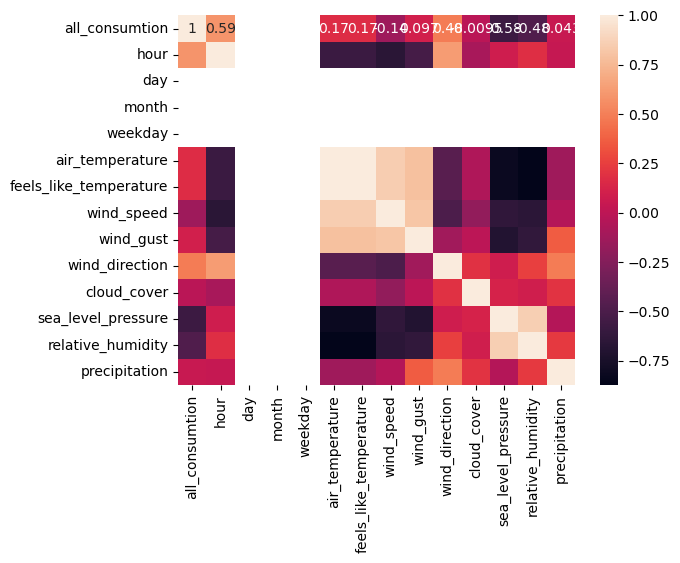

In [203]:
dfcr = df2_1.corr( numeric_only=True)
sns.heatmap(dfcr, annot=True)

In [204]:
X = df2.drop(columns=['all_consumtion', 'dateTime'])
y = df2['all_consumtion']
X = X.fillna(0)
Xtrain = df2_1.drop(columns=['all_consumtion', 'dateTime'])
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
pred = model.predict(Xtrain)
mean_squared_error(y_test, y_pred)
model.score(X_test, y_test)
print(model.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
print(model.feature_importances_)

df2_1['Random Forest'] = model.predict(Xtrain)

0.9582477752807116
1798.154647346637
[0.63365417 0.03541479 0.13987828 0.19105276 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [205]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
pred = lr.predict(Xtrain)
mean_squared_error(y_test, y_pred)
lr.score(X_test, y_test)
print(lr.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
print(lr.coef_)
print(lr.intercept_)
df2_1['Linear Regression'] = lr.predict(Xtrain)


0.11441155534012448
38139.88327826698
[  7.79181408   0.38040118  -1.08085862 -24.28949879   0.
   0.           0.           0.           0.           0.
   0.           0.           0.        ]
584.504155905804


In [206]:
dt = DecisionTreeRegressor(max_depth=10)    
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
pred = dt.predict(Xtrain)
mean_squared_error(y_test, y_pred)
dt.score(X_test, y_test)
print(dt.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
print(dt.feature_importances_)
df2_1['Decision Tree'] = dt.predict(Xtrain)


0.9469053223094521
2286.643216751145
[0.63325565 0.03962674 0.1377113  0.18940631 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [207]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
pred = svr.predict(Xtrain)
mean_squared_error(y_test, y_pred)
svr.score(X_test, y_test)
print(svr.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
df2_1['SVR linear'] = svr.predict(Xtrain)

0.08632680375679525
39349.417067631955


In [208]:
svr = SVR(kernel='poly')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
pred = svr.predict(Xtrain)
mean_squared_error(y_test, y_pred)
svr.score(X_test, y_test)
print(svr.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
df2_1['SVR poly'] = svr.predict(Xtrain)

0.1079640055175759
38417.56169553365


In [209]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
pred = svr.predict(Xtrain)
mean_squared_error(y_test, y_pred)
svr.score(X_test, y_test)
print(svr.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
df2_1['SVR rbf'] = svr.predict(Xtrain)

0.2662077565675549
31602.43415976355


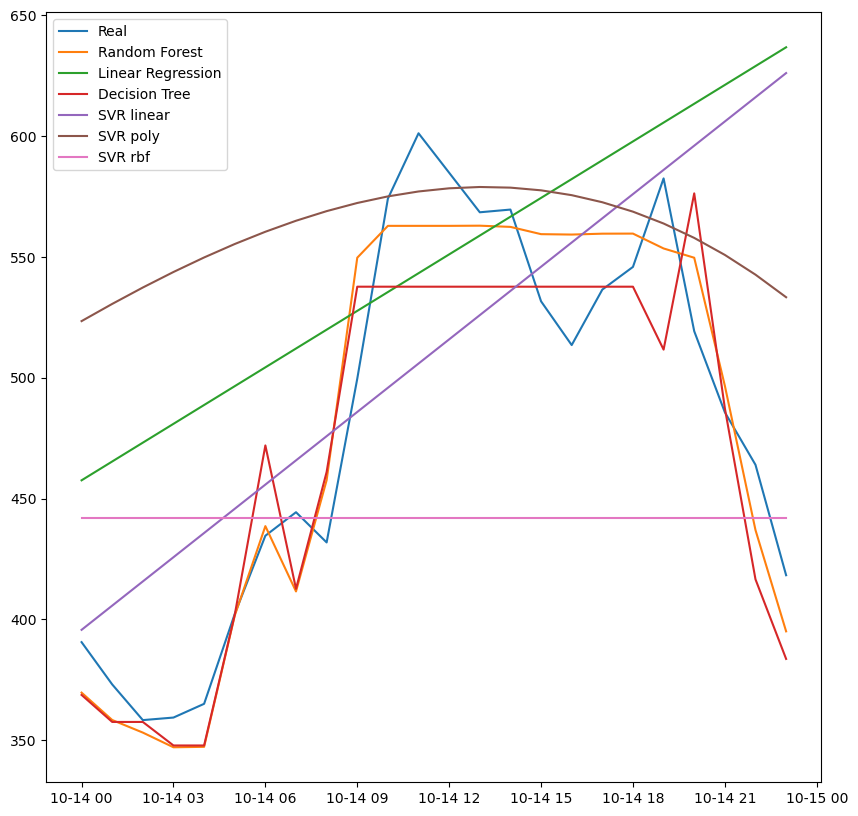

Saved comparison_plot1.png to comparison_plot.docx.


In [210]:
fig , ax = plt.subplots(figsize=(10, 10))
ax.plot(df2_1['dateTime'], df2_1['all_consumtion'], label='Real')
ax.plot(df2_1['dateTime'], df2_1['Random Forest'], label='Random Forest')
ax.plot(df2_1['dateTime'], df2_1['Linear Regression'], label='Linear Regression')
ax.plot(df2_1['dateTime'], df2_1['Decision Tree'], label='Decision Tree')
ax.plot(df2_1['dateTime'], df2_1['SVR linear'], label='SVR linear')
ax.plot(df2_1['dateTime'], df2_1['SVR poly'], label='SVR poly')
ax.plot(df2_1['dateTime'], df2_1['SVR rbf'], label='SVR rbf')
plt.legend()
plt.show()



from docx import Document
from docx.shared import Inches
import os


# Function to save a plot to a Word document
def save_plot_to_docx(plot_file, doc_file):
    try:
        # Open the existing document if it exists
        doc = Document(doc_file)
    except:
        # Create a new document if it doesn't exist
        doc = Document()
        doc.add_heading('Model Comparison Plots', level=1)

    # Add the plot image to the document
    doc.add_picture(plot_file, width=Inches(6))

    # Save the document
    doc.save(doc_file)
    print(f"Saved {plot_file} to {doc_file}.")



plot_file = "comparison_plot1.png"
fig.savefig(plot_file)
 


# doc = Document()


# doc.add_heading('Model Comparison Plot5', level=1)


# doc.add_picture(plot_file, width=Inches(6))

# print(os.getcwd())
doc_file = "comparison_plot.docx"
# doc.save(doc_file)
save_plot_to_docx(plot_file, doc_file)
# print(f"Plot: {doc_file}")

In [212]:
df = pd.read_excel(r"C:\Users\Batia\Downloads\b2c_gv_vartojimas.xlsx\b2c_gv_vartojimas.xlsx")

In [213]:
df.head()

,dateTime,0,1,2,3,4,5,6,7,8,...,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049
0,2023-08-01 00:00:00,1.128,0.301,0.078,0.083,0.306,0.239,0.666,1.050,0.284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-08-01 01:00:00,1.465,0.262,0.095,0.090,0.303,0.214,0.696,0.467,0.263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-08-01 02:00:00,0.790,0.354,0.265,0.101,0.311,0.636,0.692,0.158,0.276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-08-01 03:00:00,0.726,0.319,0.099,0.106,0.310,0.145,0.669,0.081,0.256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-08-01 04:00:00,0.659,0.257,0.076,0.085,0.319,0.146,0.687,0.176,0.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [214]:
df1 = pd.read_csv(r"C:\Users\Batia\Downloads\interval_data(3).csv")

In [215]:
df1['obs_time_utc'] = pd.to_datetime(df1['obs_time_utc'])

In [216]:
df1.rename(columns={"obs_time_utc": "dateTime"}, inplace=True)

In [217]:
df1_1 = df1.drop(columns=['condition_code'])

In [218]:
df1_1['cloud_cover'] = df1_1['cloud_cover'].dropna()

In [219]:
df['all_consumtion'] = df.iloc[:, 1:].sum(axis=1)

In [220]:
df

,dateTime,0,1,2,3,4,5,6,7,8,...,1041,1042,1043,1044,1045,1046,1047,1048,1049,all_consumtion
0,2023-08-01 00:00:00,1.128,0.301,0.078,0.083,0.306,0.239,0.666,1.050,0.284,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,495.554135
1,2023-08-01 01:00:00,1.465,0.262,0.095,0.090,0.303,0.214,0.696,0.467,0.263,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,404.980188
2,2023-08-01 02:00:00,0.790,0.354,0.265,0.101,0.311,0.636,0.692,0.158,0.276,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,379.356193
3,2023-08-01 03:00:00,0.726,0.319,0.099,0.106,0.310,0.145,0.669,0.081,0.256,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,367.521792
4,2023-08-01 04:00:00,0.659,0.257,0.076,0.085,0.319,0.146,0.687,0.176,0.250,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,351.327004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,2023-10-30 20:00:00,2.199,0.991,0.242,1.318,0.524,0.485,0.824,0.506,0.618,...,0.634,0.308,0.528,0.463,0.293,0.610,1.663,0.403,1.206,1137.366634
2181,2023-10-30 21:00:00,1.042,2.406,0.312,0.824,0.532,0.370,0.795,1.051,0.668,...,0.427,0.399,0.708,0.946,0.368,0.369,1.556,0.370,0.830,1094.216201
2182,2023-10-30 22:00:00,0.983,1.079,0.703,0.353,0.932,0.380,0.610,0.582,1.759,...,0.345,0.097,0.710,0.164,0.701,0.400,0.623,0.402,0.137,952.857967
2183,2023-10-30 23:00:00,0.892,0.809,0.204,1.725,0.556,0.185,0.426,0.657,0.672,...,0.636,0.111,0.692,0.129,0.176,0.408,0.348,0.282,0.565,811.025201


In [221]:
df['dateTime'] = pd.to_datetime(df['dateTime'])

In [222]:
df = df[['dateTime', 'all_consumtion']].copy()

In [223]:
df['hour'] = df['dateTime'].dt.hour 
df['day'] = df['dateTime'].dt.day
df['month'] = df['dateTime'].dt.month
df['weekday'] = df['dateTime'].dt.weekday

In [224]:
df.head()

,dateTime,all_consumtion,hour,day,month,weekday
0,2023-08-01 00:00:00,495.554135,0,1,8,1
1,2023-08-01 01:00:00,404.980188,1,1,8,1
2,2023-08-01 02:00:00,379.356193,2,1,8,1
3,2023-08-01 03:00:00,367.521792,3,1,8,1
4,2023-08-01 04:00:00,351.327004,4,1,8,1


In [225]:
df2 = pd.merge(df, df1_1, on='dateTime', how='left')

In [226]:
df2.head()

,dateTime,all_consumtion,hour,day,month,weekday,air_temperature,feels_like_temperature,wind_speed,wind_gust,wind_direction,cloud_cover,sea_level_pressure,relative_humidity,precipitation
0,2023-08-01 00:00:00,495.554135,0,1,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-08-01 01:00:00,404.980188,1,1,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-08-01 02:00:00,379.356193,2,1,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-08-01 03:00:00,367.521792,3,1,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-08-01 04:00:00,351.327004,4,1,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
df2_1 = df2[1776:1799].copy()
df2 = df2[:1775].copy()

In [228]:
df2_1.head()

,dateTime,all_consumtion,hour,day,month,weekday,air_temperature,feels_like_temperature,wind_speed,wind_gust,wind_direction,cloud_cover,sea_level_pressure,relative_humidity,precipitation
1776,2023-10-14 00:00:00,610.148631,0,14,10,5,14.1,14.1,5.2,10.7,181.0,100.0,1004.6,88.0,0.0
1777,2023-10-14 01:00:00,547.130159,1,14,10,5,15.0,15.0,4.5,9.0,188.0,88.0,1004.1,86.0,0.0
1778,2023-10-14 02:00:00,494.762535,2,14,10,5,15.2,15.2,4.9,8.9,191.0,88.0,1003.9,86.0,0.0
1779,2023-10-14 03:00:00,476.865832,3,14,10,5,15.2,15.2,4.3,9.1,192.0,88.0,1003.9,87.0,0.0
1780,2023-10-14 04:00:00,465.414444,4,14,10,5,15.0,15.0,4.0,7.9,188.0,88.0,1003.1,91.0,0.2


c:\Users\Batia\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

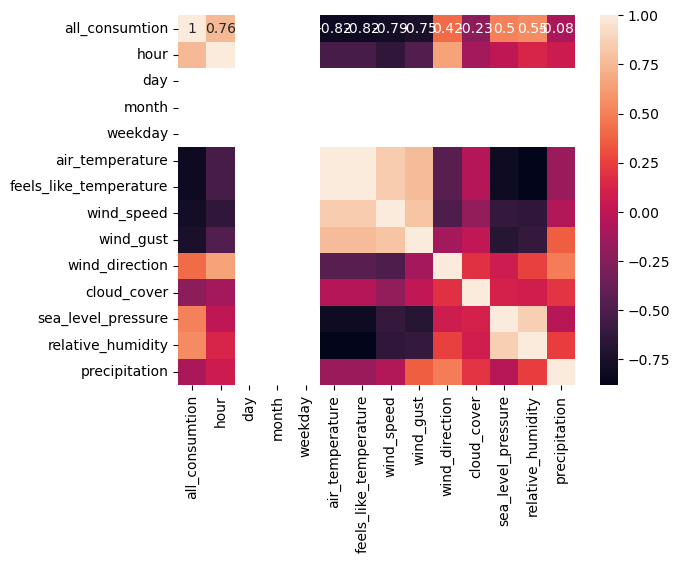

In [229]:
dfcr = df2_1.corr( numeric_only=True)
sns.heatmap(dfcr, annot=True)

In [230]:
X = df2.drop(columns=['all_consumtion', 'dateTime'])
y = df2['all_consumtion']
X = X.fillna(0)
Xtrain = df2_1.drop(columns=['all_consumtion', 'dateTime'])
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
pred = model.predict(Xtrain)
mean_squared_error(y_test, y_pred)
model.score(X_test, y_test)
print(model.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
print(model.feature_importances_)

df2_1['Random Forest'] = model.predict(Xtrain)

0.946947785180414
2787.626226279356
[0.79879334 0.05769243 0.11311625 0.03039798 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [231]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
pred = lr.predict(Xtrain)
mean_squared_error(y_test, y_pred)
lr.score(X_test, y_test)
print(lr.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
print(lr.coef_)
print(lr.intercept_)
df2_1['Linear Regression'] = lr.predict(Xtrain)


0.20244046165993368
41907.72984043675
[11.3606499   1.46010143 82.2217006   5.42711795  0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
-452.80106501055906


In [232]:
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
pred = dt.predict(Xtrain)
mean_squared_error(y_test, y_pred)
dt.score(X_test, y_test)
print(dt.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
print(dt.feature_importances_)
df2_1['Decision Tree'] = dt.predict(Xtrain)


0.9226157831193375
4066.15017318721
[0.80041108 0.05784254 0.11234514 0.02940124 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [233]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
pred = svr.predict(Xtrain)
mean_squared_error(y_test, y_pred)
svr.score(X_test, y_test)
print(svr.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
df2_1['SVR linear'] = svr.predict(Xtrain)


0.1602674664514021
44123.70796470262


In [234]:
svr = SVR(kernel='poly')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
pred = svr.predict(Xtrain)
mean_squared_error(y_test, y_pred)
svr.score(X_test, y_test)
print(svr.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
df2_1['SVR poly'] = svr.predict(Xtrain)

0.2731927299750767
38190.0551044287


In [235]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
pred = svr.predict(Xtrain)
mean_squared_error(y_test, y_pred)
svr.score(X_test, y_test)
print(svr.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
df2_1['SVR rbf'] = svr.predict(Xtrain)

0.0868619316468513
47980.798468296125


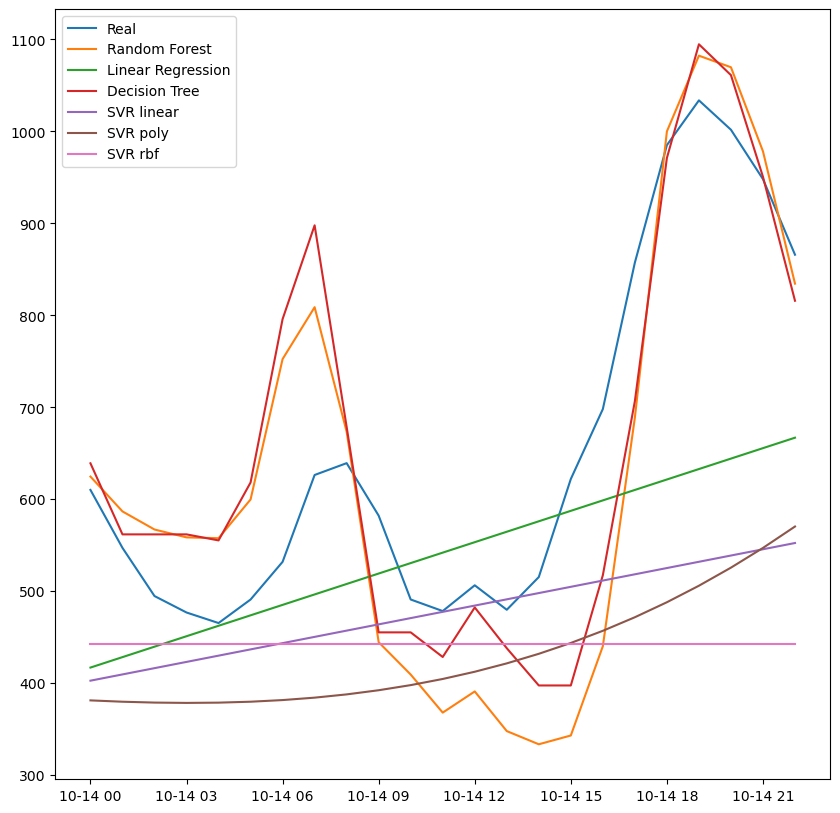

Saved comparison_plot2.png to comparison_plot.docx.


In [236]:
fig , ax = plt.subplots(figsize=(10, 10))
ax.plot(df2_1['dateTime'], df2_1['all_consumtion'], label='Real')
ax.plot(df2_1['dateTime'], df2_1['Random Forest'], label='Random Forest')
ax.plot(df2_1['dateTime'], df2_1['Linear Regression'], label='Linear Regression')
ax.plot(df2_1['dateTime'], df2_1['Decision Tree'], label='Decision Tree')
ax.plot(df2_1['dateTime'], df2_1['SVR linear'], label='SVR linear')
ax.plot(df2_1['dateTime'], df2_1['SVR poly'], label='SVR poly')
ax.plot(df2_1['dateTime'], df2_1['SVR rbf'], label='SVR rbf')
plt.legend()
plt.show()


from docx import Document
from docx.shared import Inches
import os



plot_file = "comparison_plot2.png"
fig.savefig(plot_file)
 


# doc = Document()


# doc.add_heading('Model Comparison Plot4', level=1)


# doc.add_picture(plot_file, width=Inches(6))

# print(os.getcwd())
doc_file = "comparison_plot.docx"
# doc.save(doc_file)

# print(f"Plot: {doc_file}")
save_plot_to_docx(plot_file, doc_file)

In [237]:
df = pd.read_excel(r"C:\Users\Batia\Downloads\b2c_ngv_vartojimas.xlsx\b2c_ngv_vartojimas.xlsx")

In [238]:
df1 = pd.read_csv(r"C:\Users\Batia\Downloads\interval_data(3).csv")

In [239]:
df1['obs_time_utc'] = pd.to_datetime(df1['obs_time_utc'])

In [240]:
df1.rename(columns={"obs_time_utc": "dateTime"}, inplace=True)

In [241]:
df1_1 = df1.drop(columns=['condition_code'])

In [242]:
df1_1['cloud_cover'] = df1_1['cloud_cover'].dropna()

In [243]:
df['all_consumtion'] = df.iloc[:, 1:].sum(axis=1)

In [244]:
df['dateTime'] = pd.to_datetime(df['dateTime'])

In [245]:
df = df[['dateTime', 'all_consumtion']].copy()

In [246]:
df['hour'] = df['dateTime'].dt.hour 
df['day'] = df['dateTime'].dt.day
df['month'] = df['dateTime'].dt.month
df['weekday'] = df['dateTime'].dt.weekday

In [247]:
df2 = pd.merge(df, df1_1, on='dateTime', how='left')

In [248]:
df2_1 = df2[1776:1799].copy()
df2 = df2[:1775].copy()

c:\Users\Batia\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

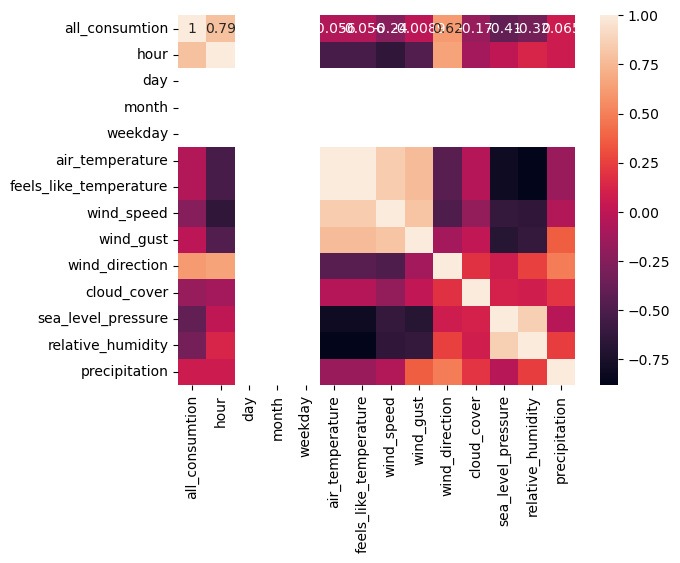

In [249]:
dfcr = df2_1.corr( numeric_only=True)
sns.heatmap(dfcr, annot=True)

In [250]:
X = df2.drop(columns=['all_consumtion', 'dateTime'])
y = df2['all_consumtion']
X = X.fillna(0)
Xtrain = df2_1.drop(columns=['all_consumtion', 'dateTime'])
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
pred = model.predict(Xtrain)
mean_squared_error(y_test, y_pred)
model.score(X_test, y_test)
print(model.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
print(model.feature_importances_)
df2_1['Random Forest'] = model.predict(Xtrain)


0.9765118317877657
95.52268548144703
[0.84778765 0.02892483 0.07672315 0.04656436 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [251]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
pred = lr.predict(Xtrain)
mean_squared_error(y_test, y_pred)
lr.score(X_test, y_test)
print(lr.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
print(lr.coef_)
print(lr.intercept_)
df2_1['Linear Regression'] = lr.predict(Xtrain)

0.6059309712036716
1602.6167539145981
[ 6.78947667  0.40493471 21.04722504  2.82024214  0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
-70.93902764402083


In [252]:
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
pred = dt.predict(Xtrain)
mean_squared_error(y_test, y_pred)
dt.score(X_test, y_test)
print(dt.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
print(dt.feature_importances_)
df2_1['Decision Tree'] = dt.predict(Xtrain)

0.9629092117162251
150.84240164988756
[0.84653963 0.0290276  0.0739751  0.05045766 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [253]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
pred = svr.predict(Xtrain)
mean_squared_error(y_test, y_pred)
svr.score(X_test, y_test)
print(svr.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
df2_1['SVR linear'] = svr.predict(Xtrain)

0.5918222076807396
1659.9948758845846


In [254]:
svr = SVR(kernel='poly')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
pred = svr.predict(Xtrain)
mean_squared_error(y_test, y_pred)
svr.score(X_test, y_test)
print(svr.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
df2_1['SVR poly'] = svr.predict(Xtrain)

0.4749711450895606
2135.209767025229


In [255]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
pred = svr.predict(Xtrain)
mean_squared_error(y_test, y_pred)
svr.score(X_test, y_test)
print(svr.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
df2_1['SVR rbf'] = svr.predict(Xtrain)

0.6034319806708965
1612.7797553256253


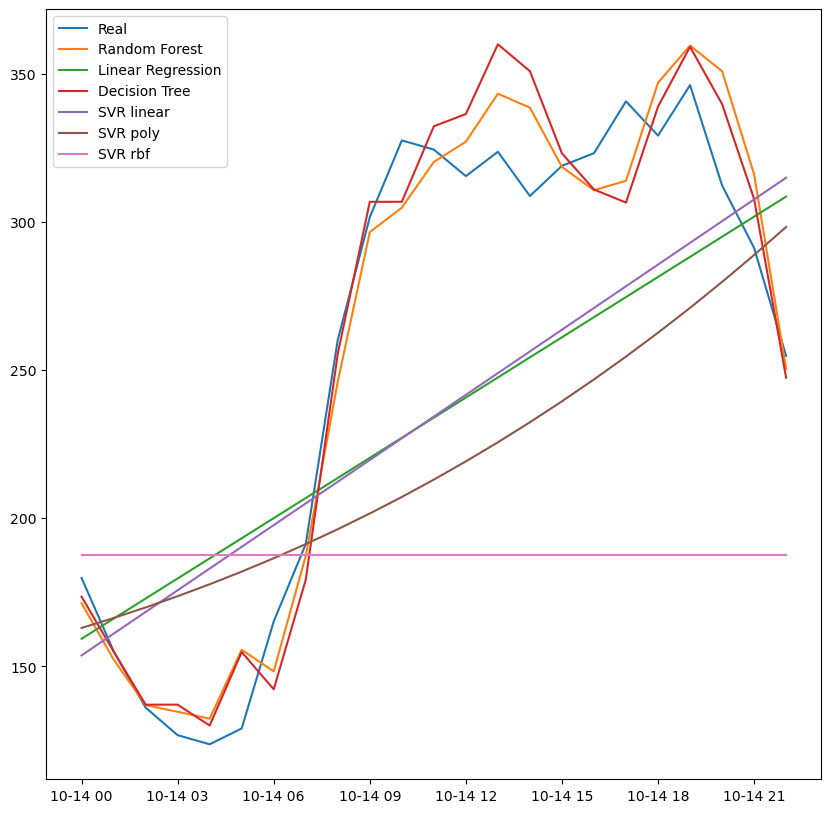

Saved comparison_plot3.png to comparison_plot.docx.


In [256]:
fig , ax = plt.subplots(figsize=(10, 10))
ax.plot(df2_1['dateTime'], df2_1['all_consumtion'], label='Real')
ax.plot(df2_1['dateTime'], df2_1['Random Forest'], label='Random Forest')
ax.plot(df2_1['dateTime'], df2_1['Linear Regression'], label='Linear Regression')
ax.plot(df2_1['dateTime'], df2_1['Decision Tree'], label='Decision Tree')
ax.plot(df2_1['dateTime'], df2_1['SVR linear'], label='SVR linear')
ax.plot(df2_1['dateTime'], df2_1['SVR poly'], label='SVR poly')
ax.plot(df2_1['dateTime'], df2_1['SVR rbf'], label='SVR rbf')
plt.legend()
plt.show()

plot_file = "comparison_plot3.png"
fig.savefig(plot_file)

doc_file = "comparison_plot.docx"
# doc.add_heading('Model Comparison Plot4', level=1)
save_plot_to_docx(plot_file, doc_file)


In [63]:
air_frcst = pd.read_json(r"C:\Users\Batia\Downloads\2025-01-12airr.json", orient='records')

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

In [55]:
air_frcst

,"{""station"":{""code"":""vilniaus-ams""","name:""Vilniaus AMS""","coordinates:{""latitude"":54.625992",longitude:25.107064}},"observations:[{""observationTimeUtc"":""2025-01-12 00:00:00""",airTemperature:-0.9,feelsLikeTemperature:-2.6,windSpeed:1.4,windGust:2.5,windDirection:165,...,airTemperature:-1.2.2,feelsLikeTemperature:-4.2,windSpeed:2.3,windGust:7.1,windDirection:348,cloudCover:100.20,seaLevelPressure:1029,relativeHumidity:86,precipitation:0.23,"conditionCode:""snow""}]}"


In [118]:
import pandas as pd
import json


with open(r"C:\Users\Batia\Downloads\2025-01-12airr.json", "r") as file:
    data = json.load(file)


observations = data['observations']


df_airf = pd.DataFrame(observations)


print(df_airf)


     observationTimeUtc  airTemperature  feelsLikeTemperature  windSpeed  \
0   2025-01-12 00:00:00            -0.9                  -2.6        1.4   
1   2025-01-12 01:00:00            -1.0                  -3.2        1.7   
2   2025-01-12 02:00:00            -1.0                  -2.7        1.4   
3   2025-01-12 03:00:00            -1.0                  -3.1        1.6   
4   2025-01-12 04:00:00            -1.2                  -1.2        1.0   
5   2025-01-12 05:00:00            -1.0                  -1.0        1.3   
6   2025-01-12 06:00:00            -1.0                  -2.9        1.5   
7   2025-01-12 07:00:00            -0.8                  -0.8        1.1   
8   2025-01-12 08:00:00            -0.6                  -0.6        1.1   
9   2025-01-12 09:00:00            -0.5                  -0.5        1.3   
10  2025-01-12 10:00:00            -0.3                  -0.3        1.3   
11  2025-01-12 11:00:00             0.0                  -2.1        1.7   
12  2025-01-

In [119]:
df_airf['observationTimeUtc'] = pd.to_datetime(df_airf['observationTimeUtc'])

In [120]:
df_airf.rename(columns={"observationTimeUtc": "dateTime"}, inplace=True)

In [121]:
df_airf_1 = df_airf.drop(columns=['conditionCode'])

In [122]:
df_airf_1['cloudCover'] = df_airf_1['cloudCover'].dropna()

In [123]:
df_airf_1['hour'] = df_airf_1['dateTime'].dt.hour
df_airf_1['day'] = df_airf_1['dateTime'].dt.day
df_airf_1['month'] = df_airf_1['dateTime'].dt.month
df_airf_1['weekday'] = df_airf_1['dateTime'].dt.weekday

In [124]:
df_airf_1.correlation = df_airf_1.corr( numeric_only=True)

C:\Users\Batia\AppData\Local\Temp\ipykernel_72292\150287094.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_airf_1.correlation = df_airf_1.corr( numeric_only=True)


In [125]:
df_airf_1.corr()

,dateTime,airTemperature,feelsLikeTemperature,windSpeed,windGust,windDirection,cloudCover,seaLevelPressure,relativeHumidity,precipitation,hour,day,month,weekday
dateTime,1.000000,0.038468,-0.364459,0.519231,0.701307,0.869739,0.081903,0.983160,-0.559548,0.061009,1.000000,NaN,NaN,NaN
airTemperature,0.038468,1.000000,0.374026,-0.167315,-0.227752,-0.186504,-0.557067,-0.093689,-0.213142,0.304500,0.038468,NaN,NaN,NaN
feelsLikeTemperature,-0.364459,0.374026,1.000000,-0.902925,-0.815101,-0.270766,-0.302229,-0.492155,0.496275,0.303569,-0.364459,NaN,NaN,NaN
windSpeed,0.519231,-0.167315,-0.902925,1.000000,0.875080,0.316001,0.088645,0.613891,-0.560572,-0.340504,0.519231,NaN,NaN,NaN
windGust,0.701307,-0.227752,-0.815101,0.875080,1.000000,0.570704,0.199319,0.792293,-0.706603,-0.054458,0.701307,NaN,NaN,NaN
windDirection,0.869739,-0.186504,-0.270766,0.316001,0.570704,1.000000,0.421078,0.865917,-0.247864,0.243618,0.869739,NaN,NaN,NaN
cloudCover,0.081903,-0.557067,-0.302229,0.088645,0.199319,0.421078,1.000000,0.142676,0.129719,0.094909,0.081903,NaN,NaN,NaN
seaLevelPressure,0.983160,-0.093689,-0.492155,0.613891,0.792293,0.865917,0.142676,1.000000,-0.589662,-0.001589,0.983160,NaN,NaN,NaN
relativeHumidity,-0.559548,-0.213142,0.496275,-0.560572,-0.706603,-0.247864,0.129719,-0.589662,1.000000,0.012311,-0.559548,NaN,NaN,NaN
precipitation,0.061009,0.304500,0.303569,-0.340504,-0.054458,0.243618,0.094909,-0.001589,0.012311,1.000000,0.061009,NaN,NaN,NaN


In [75]:
df_airf_12 = df_airf_1[['cloudCover', 'relativeHumidity', 'precipitation' , 'hour' , 'airTemperature' , 'windGust' , 'seaLevelPressure']].copy()

In [126]:
df_airf_1 = df_airf_1.rename(columns={"cloudCover": "cloud_cover", "relativeHumidity": "relative_humidity", "precipitation": "precipitation", "hour": "hour", "airTemperature": "air_temperature", "windGust": "wind_gust", "seaLevelPressure": "sea_level_pressure", "day": "day", "month": "month", "weekday": "weekday", "dateTime": "dateTime", "windDirection": "wind_direction", "windSpeed": "wind_speed", "feelsLikeTemperature": "feels_like_temperature"})

In [127]:
df_airf_1.drop(columns=['dateTime'])

,air_temperature,feels_like_temperature,wind_speed,wind_gust,wind_direction,cloud_cover,sea_level_pressure,relative_humidity,precipitation,hour,day,month,weekday
0,-0.9,-2.6,1.4,2.5,165,100,1009.9,96,0.0,0,12,1,6
1,-1.0,-3.2,1.7,3.1,165,100,1010.1,97,0.0,1,12,1,6
2,-1.0,-2.7,1.4,2.7,169,100,1010.5,97,0.0,2,12,1,6
3,-1.0,-3.1,1.6,2.5,172,100,1010.9,97,0.0,3,12,1,6
4,-1.2,-1.2,1.0,1.9,190,100,1011.4,98,0.0,4,12,1,6
5,-1.0,-1.0,1.3,2.0,177,100,1011.9,98,0.0,5,12,1,6
6,-1.0,-2.9,1.5,2.7,179,100,1012.6,98,0.0,6,12,1,6
7,-0.8,-0.8,1.1,3.0,238,100,1013.4,96,0.0,7,12,1,6
8,-0.6,-0.6,1.1,2.4,203,100,1014.1,96,0.0,8,12,1,6
9,-0.5,-0.5,1.3,2.6,163,88,1014.8,96,0.0,9,12,1,6


In [131]:
df_airf_12 = df_airf_1[['hour', 'day', 'month', 'weekday', 'air_temperature', 'feels_like_temperature', 'wind_speed', 'wind_gust', 'wind_direction' , 'cloud_cover',	'sea_level_pressure',	'relative_humidity',	'precipitation' ]]

In [132]:
df_airf_12

,hour,day,month,weekday,air_temperature,feels_like_temperature,wind_speed,wind_gust,wind_direction,cloud_cover,sea_level_pressure,relative_humidity,precipitation
0,0,12,1,6,-0.9,-2.6,1.4,2.5,165,100,1009.9,96,0.0
1,1,12,1,6,-1.0,-3.2,1.7,3.1,165,100,1010.1,97,0.0
2,2,12,1,6,-1.0,-2.7,1.4,2.7,169,100,1010.5,97,0.0
3,3,12,1,6,-1.0,-3.1,1.6,2.5,172,100,1010.9,97,0.0
4,4,12,1,6,-1.2,-1.2,1.0,1.9,190,100,1011.4,98,0.0
5,5,12,1,6,-1.0,-1.0,1.3,2.0,177,100,1011.9,98,0.0
6,6,12,1,6,-1.0,-2.9,1.5,2.7,179,100,1012.6,98,0.0
7,7,12,1,6,-0.8,-0.8,1.1,3.0,238,100,1013.4,96,0.0
8,8,12,1,6,-0.6,-0.6,1.1,2.4,203,100,1014.1,96,0.0
9,9,12,1,6,-0.5,-0.5,1.3,2.6,163,88,1014.8,96,0.0


In [172]:
X = df2.drop(columns=['all_consumtion', 'dateTime'])
y = df2['all_consumtion']
X = X.fillna(0)
Xtrain = df_airf_12
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model1 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
pred = model.predict(Xtrain)
mean_squared_error(y_test, y_pred)
model1.score(X_test, y_test)
print(model1.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
print(model1.feature_importances_)

predairf = model1.predict(df_airf_12)

df_airf_1['Random Forest'] = model1.predict(df_airf_12)


0.9765118317877657
95.52268548144703
[0.84778765 0.02892483 0.07672315 0.04656436 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [170]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
pred = lr.predict(Xtrain)
mean_squared_error(y_test, y_pred)
lr.score(X_test, y_test)
print(lr.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred)) 


predlr = lr.predict(df_airf_12)


df_airf_1['Linear Regression'] = lr.predict(df_airf_12)

0.6059309712036716
1602.6167539145981


In [171]:
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
pred = dt.predict(Xtrain)
mean_squared_error(y_test, y_pred)
dt.score(X_test, y_test)
print(dt.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
print(dt.feature_importances_)

preddt = dt.predict(df_airf_12)

df_airf_1['Decision Tree'] = dt.predict(df_airf_12)

0.963354323400936
149.03220244326718
[0.8465462  0.02905426 0.07404918 0.05035036 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [166]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
pred = svr.predict(Xtrain)
mean_squared_error(y_test, y_pred)
svr.score(X_test, y_test)
print(svr.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
predsvr = svr.predict(df_airf_12)

df_airf_1['SVR linear'] = svr.predict(df_airf_12)

0.5918222076807396
1659.9948758845846


In [168]:
svr = SVR(kernel='poly')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
pred = svr.predict(Xtrain)
mean_squared_error(y_test, y_pred)
svr.score(X_test, y_test)
print(svr.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))

predsvr = svr.predict(df_airf_12)

df_airf_1['SVR poly'] = svr.predict(df_airf_12)

0.4749711450895606
2135.209767025229


In [169]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
pred = svr.predict(Xtrain)
mean_squared_error(y_test, y_pred)
svr.score(X_test, y_test)
print(svr.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))

predsvr = svr.predict(df_airf_12)

df_airf_1['SVR rbf'] = svr.predict(df_airf_12)

0.6034319806708965
1612.7797553256253


In [149]:
dfl = pd.read_excel(r"C:\Users\Batia\Desktop\2025-01-12-NORDPOOLMWh.ods")

In [150]:
dfl.head()

,Unnamed: 0,Unnamed: 1
0,Laikas,MWH
1,01:00-02:00,1274.8
2,02:00-03:00,1243.3
3,03:00-04:00,1223.8
4,04:00-05:00,1219.3


In [151]:
dfl1 = dfl[1:].reset_index(drop=True)

In [152]:
dfl1.head()

,Unnamed: 0,Unnamed: 1
0,01:00-02:00,1274.8
1,02:00-03:00,1243.3
2,03:00-04:00,1223.8
3,04:00-05:00,1219.3
4,05:00-06:00,1239.5


In [155]:
dfl1['Hour'] = dfl1['Unnamed: 0'].str.extract(r'(\d{2})')

In [156]:
dfl1['Hour'] = dfl1['Hour'].astype(int)
dfl1.head()

,Unnamed: 0,Unnamed: 1,Hour
0,01:00-02:00,1274.8,1
1,02:00-03:00,1243.3,2
2,03:00-04:00,1223.8,3
3,04:00-05:00,1219.3,4
4,05:00-06:00,1239.5,5


In [157]:
dfl1.head(30)

,Unnamed: 0,Unnamed: 1,Hour
0,01:00-02:00,1274.8,1
1,02:00-03:00,1243.3,2
2,03:00-04:00,1223.8,3
3,04:00-05:00,1219.3,4
4,05:00-06:00,1239.5,5
5,06:00-07:00,1295,6
6,07:00-08:00,1368,7
7,08:00-09:00,1439.5,8
8,09:00-10:00,1532,9
9,10:00-11:00,1652,10


In [159]:
dfl12 = dfl1.groupby(['Hour']).sum().reset_index()

In [160]:
dfl12.head()

,Hour,Unnamed: 0,Unnamed: 1
0,0,00:00-01:00,1271.5
1,1,01:00-02:00,1274.8
2,2,02:00-03:00,1243.3
3,3,03:00-04:00,1223.8
4,4,04:00-05:00,1219.3


In [161]:
dfl12['datetime'] = pd.date_range(start="2025-01-12 00:00:00", periods=24, freq='H')

In [162]:
dfl12.head()

,Hour,Unnamed: 0,Unnamed: 1,datetime
0,0,00:00-01:00,1271.5,2025-01-12 00:00:00
1,1,01:00-02:00,1274.8,2025-01-12 01:00:00
2,2,02:00-03:00,1243.3,2025-01-12 02:00:00
3,3,03:00-04:00,1223.8,2025-01-12 03:00:00
4,4,04:00-05:00,1219.3,2025-01-12 04:00:00


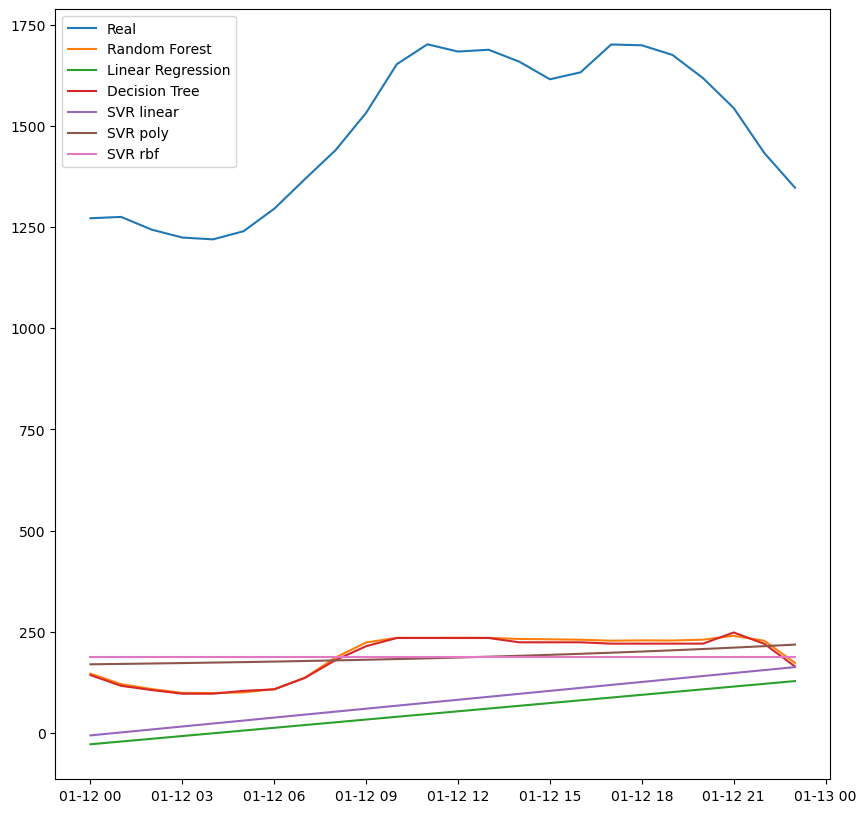

Saved comparison_plot5.png to comparison_plot.docx.


In [257]:
from docx import Document
from docx.shared import Inches
import os

fig , ax = plt.subplots(figsize=(10, 10))
ax.plot(dfl12['datetime'], dfl12['Unnamed: 1'], label='Real')
ax.plot(df_airf_1['dateTime'], df_airf_1['Random Forest'], label='Random Forest')
ax.plot(df_airf_1['dateTime'], df_airf_1['Linear Regression'], label='Linear Regression')
ax.plot(df_airf_1['dateTime'], df_airf_1['Decision Tree'], label='Decision Tree')
ax.plot(df_airf_1['dateTime'], df_airf_1['SVR linear'], label='SVR linear')
ax.plot(df_airf_1['dateTime'], df_airf_1['SVR poly'], label='SVR poly')
ax.plot(df_airf_1['dateTime'], df_airf_1['SVR rbf'], label='SVR rbf')
ax.legend()
plt.show()


plot_file = "comparison_plot5.png"
fig.savefig(plot_file)
 


# doc = Document()


# doc.add_heading('Model Comparison Plot5', level=1)


# doc.add_picture(plot_file, width=Inches(6))

# print(os.getcwd())
doc_file = "comparison_plot.docx"
# doc.save(doc_file)

# print(f"Plot: {doc_file}")


save_plot_to_docx(plot_file, doc_file)

In [165]:
from docx import Document
from docx.shared import Inches

In [179]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from docx import Document
import numpy as np


y_true = dfl12['Unnamed: 1']
y_pred_rf = df_airf_1['Random Forest']
y_pred_lr = df_airf_1['Linear Regression']
y_pred_dt = df_airf_1['Decision Tree']
y_pred_svr_linear = df_airf_1['SVR linear']
y_pred_svr_poly = df_airf_1['SVR poly']
y_pred_svr_rbf = df_airf_1['SVR rbf']


def calculate_scores(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2 Score": r2_score(y_true, y_pred)
    }


scores = {
    "Random Forest": calculate_scores(y_true, y_pred_rf),
    "Linear Regression": calculate_scores(y_true, y_pred_lr),
    "Decision Tree": calculate_scores(y_true, y_pred_dt),
    "SVR Linear": calculate_scores(y_true, y_pred_svr_linear),
    "SVR Poly": calculate_scores(y_true, y_pred_svr_poly),
    "SVR RBF": calculate_scores(y_true, y_pred_svr_rbf),
}


doc = Document()
doc.add_heading('Regression Model Scores', level=1)


for model, score in scores.items():
    doc.add_heading(model, level=2)
    for metric, value in score.items():
        doc.add_paragraph(f"{metric}: {value:.4f}")


doc_file = "model_scores.docx"
doc.save(doc_file)

print(f"The scores: {doc_file}.")


The scores: model_scores.docx.
